## ASSIGNMENT NO. 6 (EE524) : Submitted by JYOTIRMOY DEKA

Q.NO.1                                 SUPPORT VECTOR MECHANISM

[['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-seto

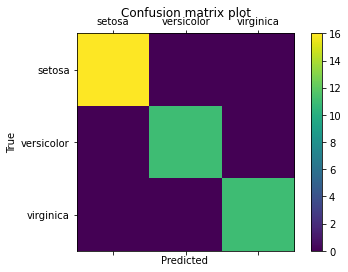

The accuracy is:
 1.0


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df =pd.read_csv("iris.csv")   ## import iris data set
X = df.iloc[:,0:4].values
Y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split         ## spliting of dataset

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,random_state= 2) 


from sklearn.svm import SVC                ## training the SVM 
svm_classifier= SVC(kernel = 'linear')
svm_classifier.fit(X_train,Y_train)

Y_predictedvalue= svm_classifier.predict(X_test)
print(np.concatenate((Y_predictedvalue.reshape(len(Y_predictedvalue),1),Y_test.reshape(len(Y_test),1)),1))


from sklearn.metrics import confusion_matrix, accuracy_score

confu = confusion_matrix(Y_test,Y_predictedvalue)          ## confusion matrix
print("the confusion matrix is:\n", confu)



labels = ['setosa','versicolor','virginica']          # plotting of the confusion matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confu)
plt.title('Confusion matrix plot')
fig.colorbar(cax)
ax.set_xticklabels(['']+ labels )
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.show()


accuracy= accuracy_score(Y_test,Y_predictedvalue)        ## accuracy calculation

print("The accuracy is:\n", accuracy)

Q.NO.2                                     Principal Component Analysis

the normalised data set is :
       value_1   value_2   value_3   value_4           class
0    0.222222  0.625000  0.067797  0.041667     Iris-setosa
1    0.166667  0.416667  0.067797  0.041667     Iris-setosa
2    0.111111  0.500000  0.050847  0.041667     Iris-setosa
3    0.083333  0.458333  0.084746  0.041667     Iris-setosa
4    0.194444  0.666667  0.067797  0.041667     Iris-setosa
..        ...       ...       ...       ...             ...
145  0.666667  0.416667  0.711864  0.916667  Iris-virginica
146  0.555556  0.208333  0.677966  0.750000  Iris-virginica
147  0.611111  0.416667  0.711864  0.791667  Iris-virginica
148  0.527778  0.583333  0.745763  0.916667  Iris-virginica
149  0.444444  0.416667  0.694915  0.708333  Iris-virginica

[150 rows x 5 columns]


the covariance matrix is:
 [[ 0.05290845 -0.00454496  0.05996621  0.05982683]
 [-0.00454496  0.03263959 -0.02271983 -0.02048285]
 [ 0.05996621 -0.02271983  0.08943348  0.09155279]
 [ 0.05982683 -0.02048285  0.09155279  0.101

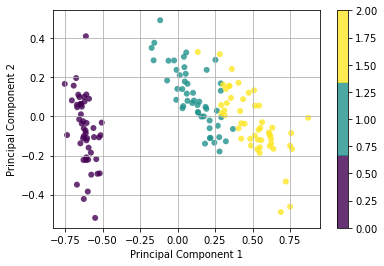

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('iris.csv')                   ## import iris data set
attributes=["value_1","value_2","value_3","value_4","class"]
data.columns=attributes

df= data[data.columns[4:5]] 
data.pop("class")
normalized_data = (data - data.min())/(data.max()-data.min()) ## minmax normalization defined
data2=pd.concat([normalized_data,df],axis=1)        ## normalized set 
print("the normalised data set is :\n",data2)

mean = np.mean(normalized_data,axis = 0)             ## mean vector
normalized_data = normalized_data - mean

cov = np.cov(normalized_data.T)
print("\n\nthe covariance matrix is:\n",cov)           ## covariance matrix


eigenvalues,eigenvectors = np.linalg.eig(cov)     ## eigen decomposition 
print("\n\n the EIGENVALUES are : \n", eigenvalues , "\n\n the EIGENVECTORS are :\n",eigenvectors)


eigenvectors = eigenvectors.T
idxs = np.argsort(eigenvalues)[::-1]                ## sorting of the eigen values in descending order
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]


projection_matrix = eigenvectors[0:2]                         ## projection matrix
print("\n\n The projection matrix is:\n ",projection_matrix)


new_projected_dataset =  np.dot( normalized_data,projection_matrix.T)       ## new projected dataset
print("\n\n The new projected dataset is :\n", new_projected_dataset)



PC1 = new_projected_dataset[:,0]
PC2 = new_projected_dataset[:,-1]

plt.scatter(PC1, PC2,c=y ,edgecolor='none',alpha = 0.8,linewidth = 2, cmap=plt.cm.get_cmap('viridis', 3))  ## plot of the principal components
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.colorbar()
plt.show()